# 1.importing packages

In [53]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
sns.set()

# 2. Reading data

In [54]:
stock_raw_data = pd.read_csv(r"C:\Users\Tarun\Desktop\DS\Machine Learning\Capstone_project_2\HDFCBANK.csv")

In [55]:
stock_raw_data.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,03-01-2000,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638120e+11,NaN,NaN,NaN
1,04-01-2000,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952260e+12,NaN,NaN,NaN
2,05-01-2000,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704090e+12,NaN,NaN,NaN
3,06-01-2000,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432170e+12,NaN,NaN,NaN
4,07-01-2000,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420160e+12,NaN,NaN,NaN
5,10-01-2000,HDFCBANK,EQ,168.35,172.90,179.50,165.00,166.30,165.90,167.79,100434,1.685220e+12,NaN,NaN,NaN
6,11-01-2000,HDFCBANK,EQ,165.90,166.50,167.90,157.00,163.00,163.40,161.40,145784,2.352910e+12,NaN,NaN,NaN
7,12-01-2000,HDFCBANK,EQ,163.40,163.75,167.95,162.30,165.10,165.45,163.89,85952,1.408660e+12,NaN,NaN,NaN
8,13-01-2000,HDFCBANK,EQ,165.45,169.90,169.90,165.00,165.95,165.10,165.26,48276,7.977870e+11,NaN,NaN,NaN
9,14-01-2000,HDFCBANK,EQ,165.10,168.00,168.00,164.00,166.00,165.45,164.68,58152,9.576540e+11,NaN,NaN,NaN


# 3.1 Dimension

In [56]:
stock_raw_data.shape

(5204, 15)

In [57]:
stock_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5204 non-null   object 
 1   Symbol              5204 non-null   object 
 2   Series              5204 non-null   object 
 3   Prev Close          5204 non-null   float64
 4   Open                5204 non-null   float64
 5   High                5204 non-null   float64
 6   Low                 5204 non-null   float64
 7   Last                5204 non-null   float64
 8   Close               5204 non-null   float64
 9   VWAP                5204 non-null   float64
 10  Volume              5204 non-null   int64  
 11  Turnover            5204 non-null   float64
 12  Trades              2354 non-null   float64
 13  Deliverable Volume  4695 non-null   float64
 14  %Deliverble         4695 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 610.0

# 3.2 Statistical summary

In [58]:
stock_raw_data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5.204000e+03,5.204000e+03,2354.000000,4.695000e+03,4695.000000
mean,997.948328,998.267179,1010.719350,984.770417,998.208878,998.194956,997.778255,1.943375e+06,2.202864e+14,76090.364486,1.183619e+06,0.597782
std,638.481104,638.133600,644.158911,632.202775,638.437227,638.404237,638.195463,3.806884e+06,4.427248e+14,88162.140713,1.999756e+06,0.120712
min,157.400000,162.150000,167.900000,157.000000,163.000000,163.400000,161.400000,1.042000e+03,2.291142e+10,807.000000,4.631000e+03,0.177900
25%,470.637500,470.000000,476.550000,463.750000,471.712500,471.212500,470.087500,2.931628e+05,1.534602e+13,26334.750000,2.564430e+05,0.523700
50%,915.675000,919.575000,935.000000,901.575000,915.700000,915.875000,917.440000,9.140735e+05,1.115150e+14,42183.500000,6.122350e+05,0.603800
75%,1389.912500,1390.225000,1412.150000,1360.837500,1391.175000,1389.987500,1390.080000,2.024575e+06,2.067470e+14,89444.250000,1.344856e+06,0.676050
max,2565.800000,2566.000000,2583.300000,2553.700000,2563.000000,2565.800000,2570.700000,1.005650e+08,1.426400e+16,790631.000000,6.669683e+07,1.000000


### Checking for null values

In [59]:
stock_raw_data.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

### Heat Map for missing values

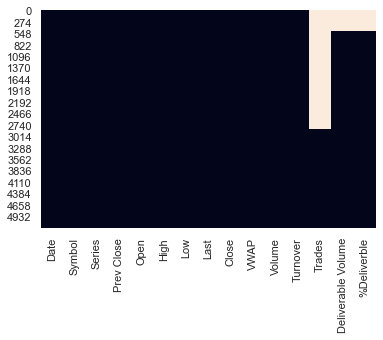

In [60]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(stock_raw_data.isnull(), cbar=False)

# display the plot
plt.show()

**Changing Date datatype to datetime**

In [61]:
stock_data = stock_raw_data.copy()

In [62]:
stock_data['Date'] = stock_data['Date'].apply(lambda x:pd.to_datetime(x))

In [63]:
stock_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-03-01,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638120e+11,NaN,NaN,NaN
1,2000-04-01,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952260e+12,NaN,NaN,NaN
2,2000-05-01,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704090e+12,NaN,NaN,NaN
3,2000-06-01,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432170e+12,NaN,NaN,NaN
4,2000-07-01,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420160e+12,NaN,NaN,NaN


In [64]:
stock_data.dtypes

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                       float64
Deliverable Volume           float64
%Deliverble                  float64
dtype: object

**Checking stock time stamp**

In [65]:
stock_data['Date'].min()

Timestamp('2000-01-02 00:00:00')

In [66]:
stock_data['Date'].max()

Timestamp('2020-12-11 00:00:00')

**Remove columns that we do not need**

In [67]:
cols = ['Symbol','Series','Prev Close','Open','High','Low','Last','VWAP','Volume','Turnover','Trades',
        'Deliverable Volume','%Deliverble']
stock_data_1 = stock_data.drop(cols, axis=1, inplace=True)
stock_data_1 = stock_data.sort_values('Date')

In [68]:
stock_data_1.isnull().sum()

Date     0
Close    0
dtype: int64

# 3.5 Indexing with date

In [69]:
stock_data_1 = stock_data_1.groupby('Date')['Close'].sum().reset_index()
stock_data_1

,Date,Close
0,2000-01-02,240.95
1,2000-01-03,234.15
2,2000-01-06,229.25
3,2000-01-08,227.45
4,2000-01-11,247.15
...,...,...
5199,2020-12-05,901.55
5200,2020-12-06,982.75
5201,2020-12-08,1063.70
5202,2020-12-10,1213.65


In [70]:
stock_data_1['Date']= pd.to_datetime(stock_data_1['Date'])
stock_data_1.set_index('Date',inplace=True)
stock_data_1.index

DatetimeIndex(['2000-01-02', '2000-01-03', '2000-01-06', '2000-01-08',
               '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
               '2000-01-17', '2000-01-18',
               ...
               '2020-11-25', '2020-11-26', '2020-11-27', '2020-12-02',
               '2020-12-03', '2020-12-05', '2020-12-06', '2020-12-08',
               '2020-12-10', '2020-12-11'],
              dtype='datetime64[ns]', name='Date', length=5204, freq=None)

In [71]:
stock_data_1.head()

,Close
Date,
2000-01-02,240.95
2000-01-03,234.15
2000-01-06,229.25
2000-01-08,227.45
2000-01-11,247.15


# 4. Visualizing data

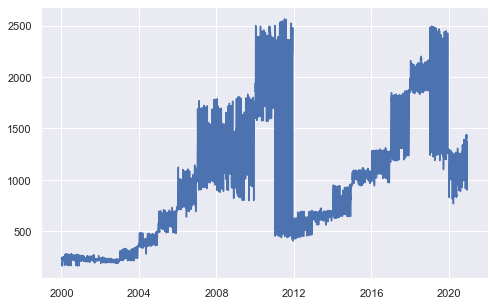

In [72]:
# plotting 6 yrs data

plt.figure(figsize=(8,5))
plt.plot(stock_data_1)
plt.show()

**Sampling**

In [73]:
data = stock_data_1['Close'].resample('MS').mean()
data.tail()

Date
2020-08-01    1079.870000
2020-09-01    1088.157143
2020-10-01    1195.285714
2020-11-01    1288.933333
2020-12-01    1114.807143
Freq: MS, Name: Close, dtype: float64

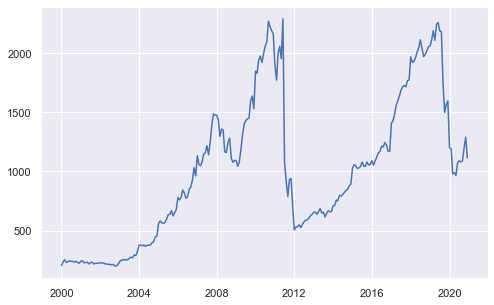

In [74]:
#after sampling

plt.figure(figsize=(8,5))
plt.plot(data)
plt.show()

**Decomposing**

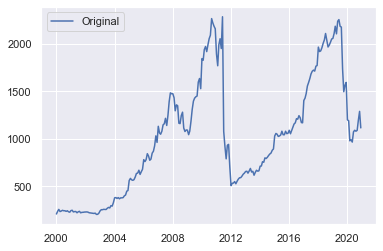

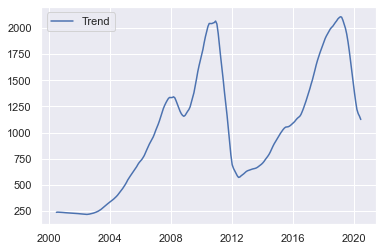

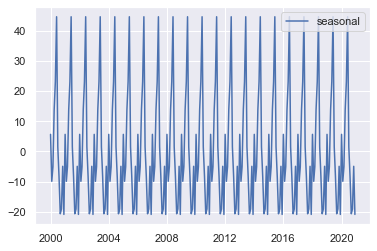

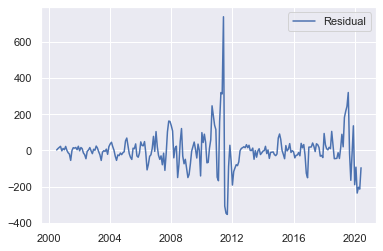

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

plt.plot(data,label='Original')
plt.legend(loc='best')

trend = decomposition.trend
plt.show()
plt.plot(trend,label='Trend')
plt.legend(loc='best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

residual = decomposition.resid
plt.show()
plt.plot(residual,label='Residual')
plt.legend(loc='best')

<Figure size 1440x1080 with 0 Axes>

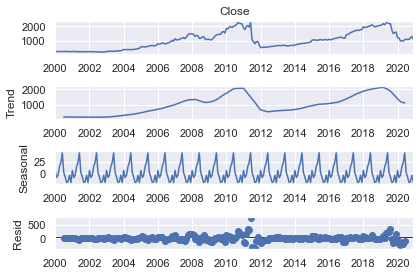

In [76]:
plt.figure(figsize=[20,15])
sm.tsa.seasonal_decompose(data).plot()
plt.show()

# ADF Test

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
def ad_test(timeseries):
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statistics','p-value','#Lags Used',
                                            'Number of Observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s) '%key] = value
    print(dfoutput)

In [27]:
ad_test(data)

Results of Dickey Fuller Test:
Test statistics                 -2.366739
p-value                          0.151345
#Lags Used                       6.000000
Number of Observations used    245.000000
Critical value (1%)             -3.457326
Critical value (5%)             -2.873410
Critical value (10%)            -2.573096
dtype: float64


Test statistics > critical value, hence we reject the null hypothesis which implies series is not stationary

# KPSS Test

In [28]:
#KPSS test is a statistical test to check for stationarity of a series around a deterministic trend.
#Like ADF test, the KPSS test is also commonly used to analyse the stationarity of a series.

from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print('Results of KPSS Test')
    kpsstest = kpss(timeseries,regression='c',nlags='legacy')

#regression: str{“c”, “ct”}
#The null hypothesis for the KPSS test.
#“c” : The data is stationary around a constant (default).
#“ct” : The data is stationary around a trend.
#nlags: {str, int}, optional
#Indicates the number of lags to be used
#If set to “legacy”, uses int(12 * (n / 100)**(1 / 4))

    
    kpss_output = pd.Series(kpsstest[0:3],index=['Test Statistics','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical value (%s)'%key] = value
    print(kpss_output)

In [29]:
kpss_test(data)

Results of KPSS Test
Test Statistics           0.803629
p-value                   0.010000
Lags Used                16.000000
Critical value (10%)      0.347000
Critical value (5%)       0.463000
Critical value (2.5%)     0.574000
Critical value (1%)       0.739000
dtype: float64


C:\Users\Tarun\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Test statistics < critical value, hence we reject the null hypothesis which implies series is stationary

**Differencing to remove seasonality**

In [30]:
#Differencing is performed by subtracting the previous observation from the current observation.
#Differencing can help stablize the mean of the time series by removing changes in the level of a time
#series and so eliminating trends and seasonality

data = data - data.shift(1)

#The shift() function is used to shift index by desired number of periods with an optional time freq.
#When freq is not passed, shift the index without realigning the data.

<AxesSubplot:xlabel='Date'>

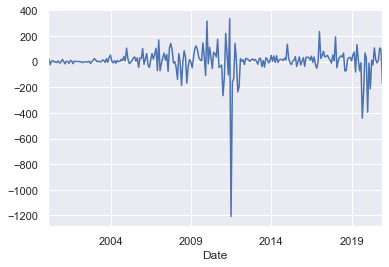

In [31]:
data.dropna(inplace=True)
data.plot()

**Decomposing again**

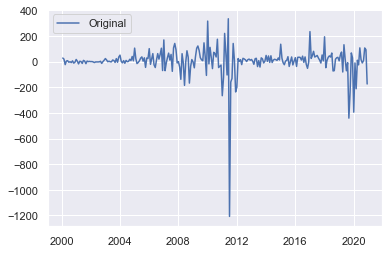

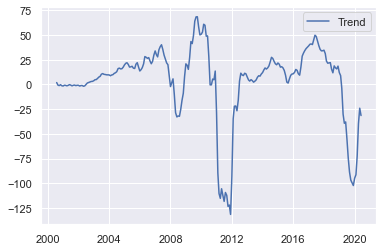

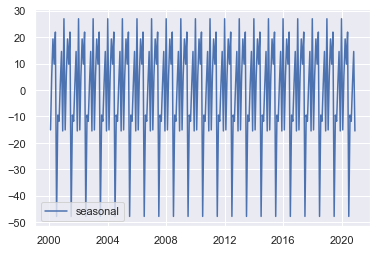

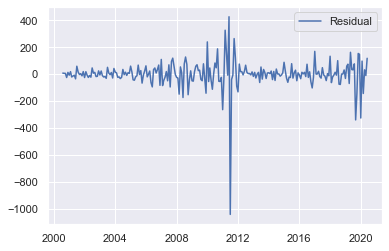

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

plt.plot(data,label='Original')
plt.legend(loc='best')

trend = decomposition.trend
plt.show()
plt.plot(trend,label='Trend')
plt.legend(loc='best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

residual = decomposition.resid
plt.show()
plt.plot(residual,label='Residual')
plt.legend(loc='best')

<Figure size 1440x1080 with 0 Axes>

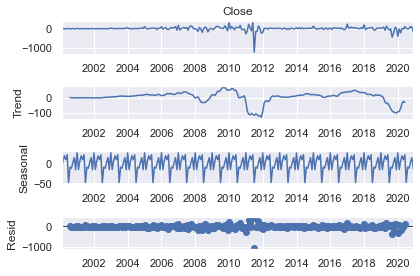

In [52]:
plt.figure(figsize=[20,15])
sm.tsa.seasonal_decompose(data).plot()
plt.show()

### ACF and PACF

C:\Users\Tarun\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


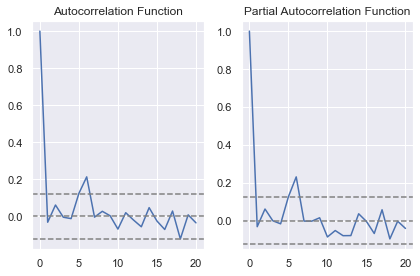

In [34]:
#ACF & PACF plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

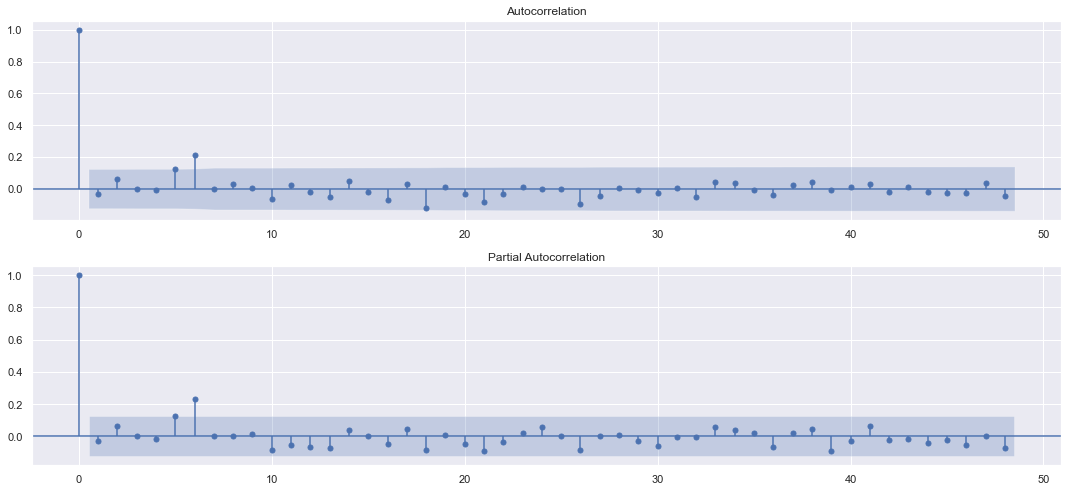

In [35]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(data.values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(data.values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

### 5. Time Series Forecasting using ARIMA

In [36]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
#The m parameter influences the p, d, and q parameters. For example, an m of 12 for monthly data
#suggests a yearly seasonal cycle.
print('Examples for parameter combination for Seasonal ARIMA....')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[3], seasonal_pdq[4]))

Examples for parameter combination for Seasonal ARIMA....
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (1, 0, 0, 12)


**Split the data into train and test**

In [37]:
size = int(len(data)*0.95)
train,test = data[0:size],data[size:len(data)]

In [38]:
test.head()

Date
2019-12-01     29.211556
2020-01-01   -394.142584
2020-02-01     -9.792246
2020-03-01   -211.316845
2020-04-01     11.347727
Freq: MS, Name: Close, dtype: float64

### 5.1 Parameter Selection

In [39]:
from pylab import rcParams

order_list = []
param_seasonal_list = []
aic_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train, order=param, 
                                            seasonal_order=param_seasonal, 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            order_list.append(param)
            param_seasonal_list.append(param_seasonal)
            aic_list.append(results.aic)
        
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2901.939764746572
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2768.6727783307833
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2911.2573317236775
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2650.3396465851565
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2779.9582291574134
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2770.672322499722
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2718.4776470367838
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2652.173934055331
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2892.496614238038
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2759.1978928773337
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2901.092707730828
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2640.9486194925335
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2781.793907814168
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2761.1976216219336
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2720.212474890704
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2642.761936944596
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3060.73353150158
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2918.688590104619
ARI

In [40]:
print(min(aic_list))
min_val = aic_list.index(min(aic_list))
min_val

2635.620679376665


27

In [41]:
order = order_list[min_val]
seasonal_order = param_seasonal_list[min_val]

## 5.2 Fitting ARIMA Model

In [42]:
mod = sm.tsa.statespace.SARIMAX(train,
                               order=order,
                               seasonal_order=seasonal_order,
                               enforce_stationarity=False,
                               enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000     86.591     -0.012      0.991    -170.716     168.716
ma.S.L12      -1.0000     86.600     -0.012      0.991    -170.732     168.732
sigma2      1.293e+04      0.006   2.05e+06      0.000    1.29e+04    1.29e+04


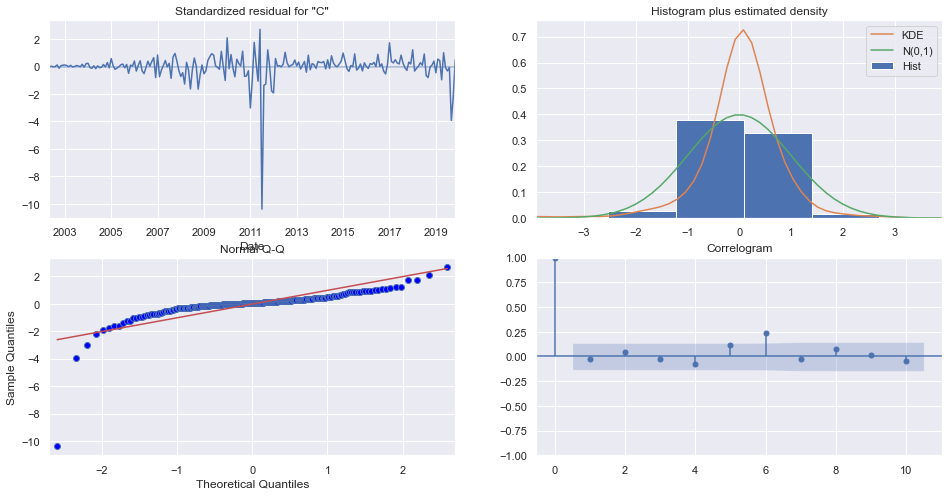

In [43]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

## 5.3 Validating Forecasts

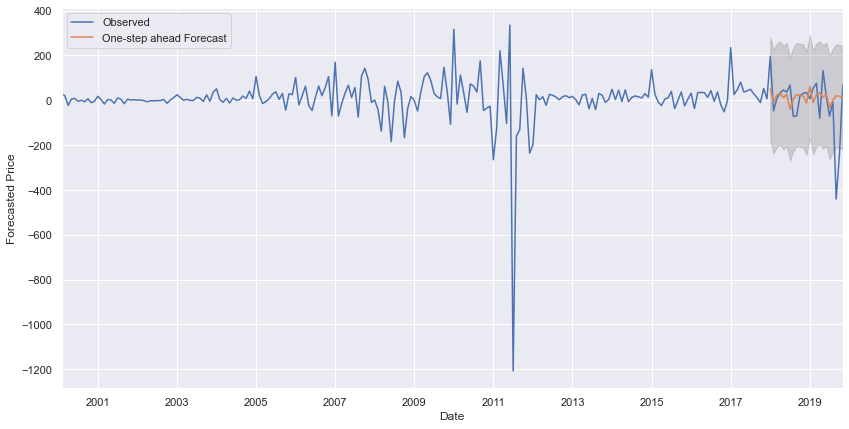

In [51]:
# set forecast to start at 2019-05-01 to the end of the data to forecast

pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
#conf_int: Returns the confidence interval of the filled parameters
ax = train['2000':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=1, figsize=(14, 7))
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color='k', alpha=0.15)
ax.set_xlabel('Date')
ax.set_ylabel('Forecasted Price')
plt.legend()
plt.show()

**5.4 Calculating MSE and RMSE**

In [45]:
y_forecasted = pred.predicted_mean
y_truth = train['2015-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean squared Error of our forecasts is 38879.55
The Root Mean squared Error of our forecasts is 197.18


**5.5 Visulaizing the Forecast**

            lower Close  upper Close
2019-12-01  -247.110936   212.951371
2020-01-01  -180.027433   280.034199
2020-02-01  -244.337057   215.724528
2020-03-01  -212.305693   247.478577
2020-04-01  -211.341131   248.441333
2020-05-01  -217.213537   242.568927
2020-06-01  -211.762466   248.019998
2020-07-01  -273.379799   186.402664
2020-08-01  -238.097118   221.685345
2020-09-01  -240.977906   218.804557
2020-10-01  -227.565306   232.217157
2020-11-01  -215.044295   244.738264
2020-12-01  -247.628476   213.022427


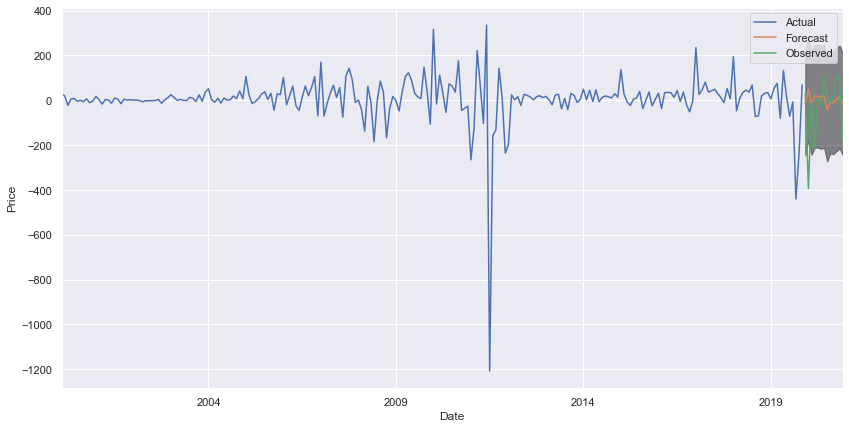

In [46]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = train.plot(label='Actual', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color='k', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
test.plot(label="Observed")
print(pred_ci)
plt.legend(loc='best')
plt.show()

**5.6 Comparing the predictions**

In [47]:
Result = pd.DataFrame()
Result['Actual'] = test
Result['Predicted'] = pred_ci['upper Close']
Result

,Actual,Predicted
Date,,
2019-12-01,29.211556,212.951371
2020-01-01,-394.142584,280.034199
2020-02-01,-9.792246,215.724528
2020-03-01,-211.316845,247.478577
2020-04-01,11.347727,248.441333
2020-05-01,-24.811842,242.568927
2020-06-01,107.934342,248.019998
2020-07-01,16.541630,186.402664
2020-08-01,-9.719130,221.685345


In [48]:
mse = ((Result['Actual'] - Result['Predicted']) ** 2).mean()
print('The Mean squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean squared Error of our forecasts is 93233.35
The Root Mean squared Error of our forecasts is 305.34


# Conclusion

The stock price increases and decreases irrespective of season and in this case i beleive this was beacuse of COVID-19 pandamic the stock price was down and that is the reason the algorithm could not predict as expected as it was an unknown factor and does not depends on previous data.